Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.94845 154.43; 7.45768 154.946; … ; 7.69175 154.162; 7.93859 154.157]

Union{Missing, Float64}[8.26425 154.374; 8.02086 154.781; … ; 7.35567 155.127; 7.32104 154.792]

Union{Missing, Float64}[7.59312 153.657; 7.71164 154.239; … ; 8.24567 154.855; 7.83752 153.942]

Union{Missing, Float64}[8.01462 154.413; 7.74699 154.905; … ; 7.73148 155.132; 7.61419 154.117]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
         Mean        SD       Naive SE      MCSE      ESS
sigma   7.769789 0.28862797 0.004563609 0.0054423685 1000
   mu 154.608314 0.41318415 0.006533015 0.0052347031 1000

Quantiles:
         2.5%       25.0%      50.0%     75.0%      97.5%  
sigma   7.238012   7.570165   7.764925   7.95575   8.367581
   mu 153.798975 154.338000 154.602000 154.88200 155.423050



Plot the density of posterior draws

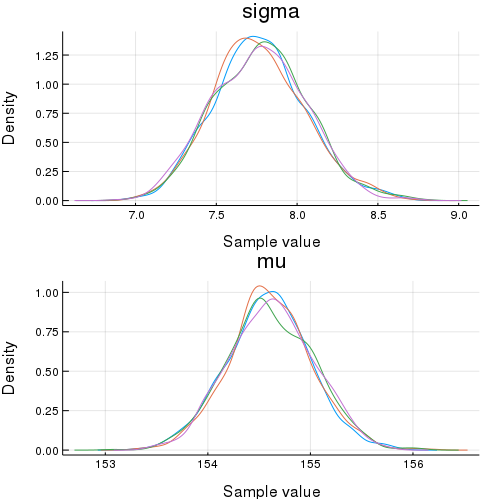

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.16576518455955952
 0.08126858225315065

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
  1.0        -0.0159502
 -0.0159502   1.0      

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*